# Given

The house prices training dataset, which looks similar to previous lab, but larger:

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|----------------------- |  
| 952             | 2                   | 1                | 65           | 271.5                  |  
| 1244            | 3                   | 2                | 64           | 232                    |  
| 1947            | 3                   | 2                | 17           | 509.8                  |  
| ...             | ...                 | ...              | ...          | ...                    |


# Find

A linear regression model, so you can then predict the price for a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.

Feature scaling:
* 1 - off
* 2 - on

# Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("./houses.txt", delimiter=",")

x_features = ['size(sqft)','bedrooms','floors','age']
x = data[:,0:4]
y = data[:,4]

m = x.shape[0]
k = x.shape[1]

### Scale features

After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization use this formulat:
$$x_{i,j} = \dfrac{x_{i,j} - \mu_j}{\sigma_j}$$ 
where $j$ selects a feature (or a column) in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature j and $\sigma_j$ is the standard deviation of feature j:
$$\mu_j = \frac{1}{m} \sum^m x_{i,j}$$
$$\sigma_j^2 = \frac{1}{m} \sum^m (x_{i,j} - \mu_j)^2$$

In [3]:
def ScaleFeatures(x):

    mean = []
    stdev = []

    x_scaled = []

    for feature in range(x.shape[1]):

        mean.append(np.mean(x[:,feature]))
        stdev.append(np.std(x[:,feature]))

    x_scaled = ( x - mean ) / stdev

    return x_scaled, mean, stdev

### Define Loss and Cost functions

In [4]:
def CalculateLoss(w, b, x):
    
    loss = np.dot(x, w) + b - y
    cost = np.sum(loss**2) / 2 / m
    
    return loss, cost

### Calculate gradient vectors

In [5]:
def CalculateGradient(w, b, x):
    
    loss, cost = CalculateLoss(w, b, x)

    dJ_dw = np.dot(loss, x) / m
    dJ_db = np.sum(loss) / m

    return dJ_dw, dJ_db, cost

### GD

In [6]:
def GD(x, iterations = 1000, alpha = 5.0e-9):

    # initial w & b

    w = np.zeros_like(x[0])
    b = 0

    # GD
    log = []

    i = 0

    while i < iterations:

        dJ_dw, dJ_db, cost = CalculateGradient(w, b, x)

        log.append([i, w, b, cost, dJ_dw, dJ_db])

        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db

        i += 1

    log = np.array(log, dtype="object")

    return w, b, log

# Answer

## Without scaling

### Model

In [7]:
alpha = 9e-7
w, b, log = GD(x, alpha = alpha, iterations = 1000)

print(f"Multiple Linear regression (unscaled): y = x * {w.astype("float")} + {b}")

Multiple Linear regression (unscaled): y = x * [ 0.26249788 -0.00355709 -0.00686245 -0.39314262] + 0.005123670605156419


### Precision

In [8]:
print(f"Final sq error is still high without feature scaling: {log[-1,3]}")

Final sq error is still high without feature scaling: 1382.226333391922


### Prediction

In [9]:
# 1200 sqft, 3 bedrooms, 1 floor, 40 years old.
prediction = np.array([1200, 3, 1, 40])
price = np.dot(prediction, w) + b

print (f"1200 sqft, 3 bedrooms, 1 floor, 40 years old will cost {price}")

1200 sqft, 3 bedrooms, 1 floor, 40 years old will cost 299.25933515225813


### Convergence

(0.0, 100.0)

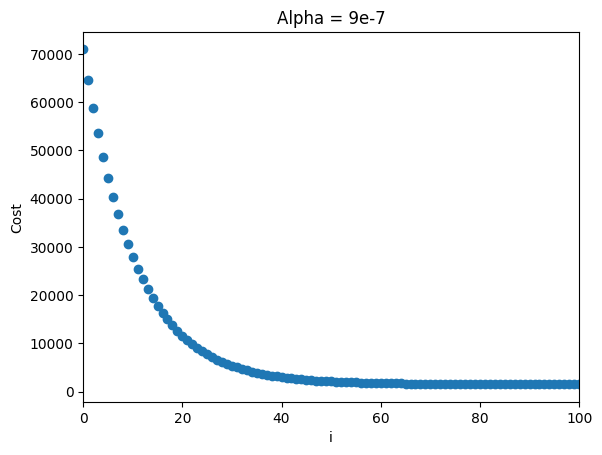

In [10]:
fig, ax = plt.subplots()
ax.scatter(log[:,0], log[:,3])
ax.set_xlabel("i")
ax.set_ylabel("Cost")
ax.set_title("Alpha = 9e-7")
ax.set_xlim([0,100])

## With scaling

In [11]:
x_scaled, mean, stdev = ScaleFeatures(x)

### Model

In [12]:
alpha = 0.1
w, b, log = GD(x_scaled, alpha = alpha, iterations = 100)

print(f"Multiple Linear regression: y = x * {w.astype("float")} + {b}")

Multiple Linear regression: y = x * [107.76066727 -20.05624432 -31.05097101 -38.32512409] + 362.2298984116164


### Prediction

In [13]:
# 1200 sqft, 3 bedrooms, 1 floor, 40 years old.
prediction = np.array([1200, 3, 1, 40])
prediction_scaled = (prediction - mean) / stdev
price = np.dot(prediction_scaled, w) + b

print (f"1200 sqft, 3 bedrooms, 1 floor, 40 years old will cost {price}")

1200 sqft, 3 bedrooms, 1 floor, 40 years old will cost 319.74671010137246


### Precision - improved

In [14]:
print(f"Final sq error is still high without feature scaling: {log[-1,3]}")

Final sq error is still high without feature scaling: 222.01847001903138


### Convergence - faster

Text(0.5, 1.0, 'Alpha = 0.1')

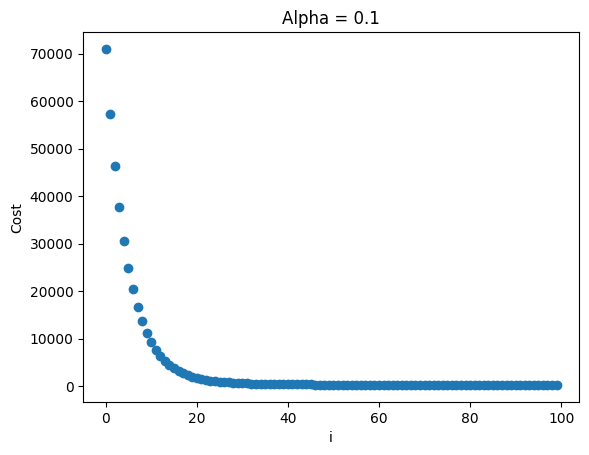

In [15]:
fig, ax = plt.subplots()
ax.scatter(log[:,0], log[:,3])
ax.set_xlabel("i")
ax.set_ylabel("Cost")
ax.set_title(f"Alpha = {alpha}")